In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [4]:
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

['NanumGothic']


In [5]:
df = pd.read_csv("./accident_data.csv")


In [6]:
df["위험도"] = (df["사망자수"]*4+df["중상자수"]*3+df["경상자수"]*2+df["부상자수"])/df["발생건수"]

In [7]:
df

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,위험도
0,2013060,2012,스쿨존어린이,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,37.588413,126.999607,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10,2.500000
1,2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10,1.500000
2,2013060,2012,스쿨존어린이,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,37.597571,127.014564,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10,3.000000
3,2013060,2012,스쿨존어린이,11290003,서울특별시 성북구3,서울특별시 성북구 석관동(석관초교 부근),3,3,0,2,1,0,37.610429,127.059596,"{type:Polygon,coordinates:[[[127.0619982,37.61...",2019-10-10,2.666667
4,2013060,2012,스쿨존어린이,11320001,서울특별시 도봉구1,서울특별시 도봉구 쌍문동(쌍문초교 부근),2,2,0,0,2,0,37.648129,127.024430,"{type:Polygon,coordinates:[[[127.0268336,37.65...",2019-10-10,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10360,2019066,2018,무단횡단,280641002,경기 파주2,경기도 파주시 금촌동(우리은행 파주금융센터 부근),5,7,0,2,5,0,37.757022,126.773592,"{type:Polygon,coordinates:[[[126.77628656,37.7...",2019-10-10,3.200000
10361,2019066,2018,무단횡단,280641003,경기 파주3,경기도 파주시 조리읍(봉일천우체국 부근),5,5,0,2,3,0,37.743755,126.806671,"{type:Polygon,coordinates:[[[126.80936607,37.7...",2019-10-10,2.400000
10362,2019066,2018,무단횡단,280641004,경기 파주4,경기도 파주시 금촌동(금촌사거리 부근),4,4,0,2,2,0,37.763186,126.773463,"{type:Polygon,coordinates:[[[126.77615816,37.7...",2019-10-10,2.500000
10363,2019066,2018,무단횡단,280941001,경기 구리1,경기도 구리시 수택동(세븐일레븐 구리으뜸점 부근),6,6,0,2,4,0,37.598290,127.136542,"{type:Polygon,coordinates:[[[127.13923669,37.5...",2019-10-10,2.333333


# 1. 연도별 총 사고건수

## => 해가 지날수록 사고건수가 감소하는 추이를 보임

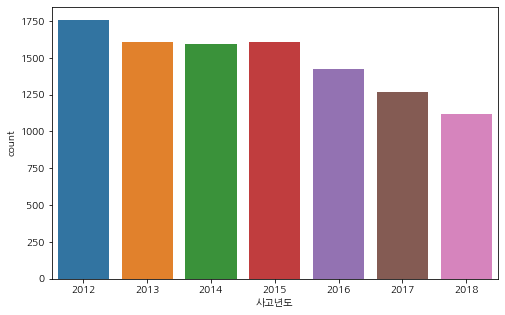

In [108]:
plt.figure(figsize=(8,5))
sns.countplot(df['사고년도'])
plt.show()

# 2. 전체년도(2012~2018) 기준 총 사고유형건수 

## => 보행노인 사고가 가장 많고, 어린이 관련사고는 적음

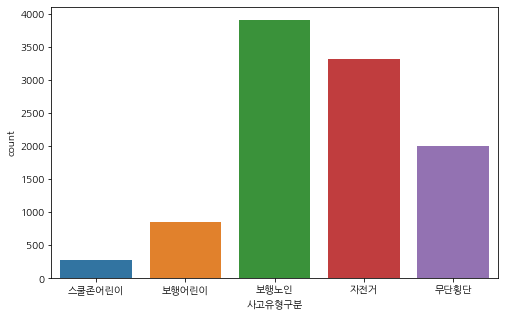

In [109]:
plt.figure(figsize=(8,5))
sns.countplot(df["사고유형구분"])
plt.show()

# 3. 연도별 사고유형
## => 보행어린이, 무단횡단 사고는 갈수록 감소하는 경향

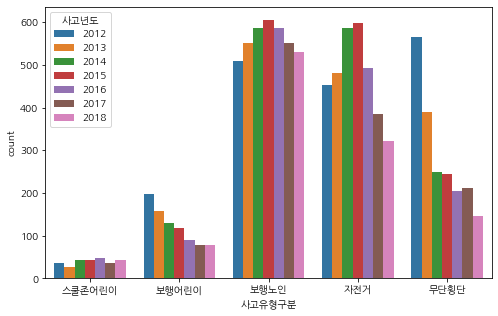

In [110]:
plt.figure(figsize=(8,5))
sns.countplot(df["사고유형구분"],hue=df["사고년도"])
plt.show()

# 4. 사고년도별 사고유형 비율
## => 1,2,3 그래프 종합

In [266]:
df2 =pd.crosstab(df["사고년도"],df["사고유형구분"])
df2


사고유형구분,무단횡단,보행노인,보행어린이,스쿨존어린이,자전거
사고년도,,,,,
2012,564,508,198,35,453
2013,389,552,158,27,480
2014,248,586,130,43,586
2015,244,606,117,43,597
2016,204,586,91,47,492
2017,212,552,79,36,386
2018,145,529,79,42,321


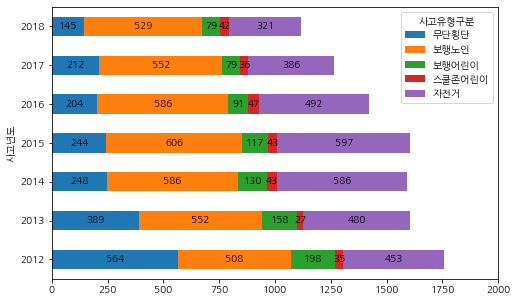

In [129]:
ax= df2.plot(kind='barh',stacked=True,rot=0,figsize=(8,5))
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(width),xy=(left+width/2, bottom+height/2), ha='center', va='center')
ax.set_yticklabels(df2.index)
ax.set_xlim([0,2000])

plt.show()

# 5. 사고년도별 사고유형 비율 2
## => pie plot으로 정확한 비율계산

In [267]:
df3=pd.crosstab(df["사고유형구분"],df["사고년도"])
df3

사고년도,2012,2013,2014,2015,2016,2017,2018
사고유형구분,,,,,,,
무단횡단,564,389,248,244,204,212,145
보행노인,508,552,586,606,586,552,529
보행어린이,198,158,130,117,91,79,79
스쿨존어린이,35,27,43,43,47,36,42
자전거,453,480,586,597,492,386,321


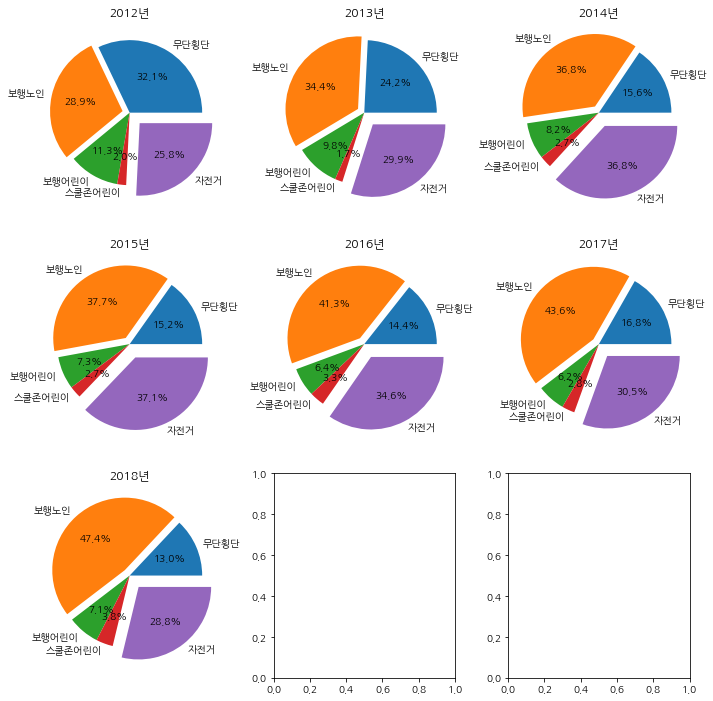

In [272]:

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(10,10))

colors=['blue','red','yellow','green','brown']


i=0
for ax1 in axes:
    for ax2 in ax1:
        ax2.pie(df3[df3.columns[i]],
                explode=[0,0.1,0,0,0.2],
                labels=df3.index,
                autopct='%1.1f%%')
        ax2.set_title('201'+str(i+2)+'년')
        i = i+1
        if i==7:
            break
            

fig.tight_layout()

# 6. 사고유형별 발생건수당 위험도
## => 위험도를 직접 계산하여 사고유형별 위험도판단
##      위험도 = 사망X4 + 중상X3 + 경상X2 +부상X1의 가중치를 부여하여 계산
##      보행노인과 무단횡단사고의 위험도가 높음(사망과 중상의 비율이 높으므로)
##      자전거는 사고횟수는 높지만 경상 및 부상이 많아 위험도가 상대적으로 낮게 측정됨

In [269]:
df4 =pd.pivot_table(df,index=["사고유형구분"],values=["위험도"])
df4

,위험도
사고유형구분,
무단횡단,2.836786
보행노인,2.885683
보행어린이,2.459580
스쿨존어린이,2.753053
자전거,2.356223


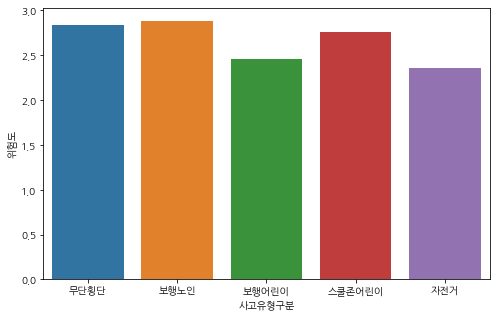

In [264]:
plt.figure(figsize=(8,5))
sns.barplot(x=df4.index,y=df4["위험도"])
plt.show()

# 7. 사고유형별 연 증가량
## => 전년대비 사고증가량 계산하여 결과도출


In [293]:
df3

사고년도,2012,2013,2014,2015,2016,2017,2018
사고유형구분,,,,,,,
무단횡단,564,389,248,244,204,212,145
보행노인,508,552,586,606,586,552,529
보행어린이,198,158,130,117,91,79,79
스쿨존어린이,35,27,43,43,47,36,42
자전거,453,480,586,597,492,386,321


In [ ]:
df5= pd.DataFrame(index=['무단횡단','보행노인','보행어린이','스쿨존어린이','자전거'],columns=[2013,2014,2015,2016,2017,2018])

In [340]:
for i in range(0,5):
    for j in range(2013,2019):
        df5[j][i]=int((df3[j][i]-df3[j-1][i])/df3[j-1][i]*100)

In [367]:
df5 = df5.swapaxes("index", "columns") 
df5


,2013,2014,2015,2016,2017,2018
무단횡단,-31,-36,-1,-16,3,-31
보행노인,8,6,3,-3,-5,-4
보행어린이,-20,-17,-10,-22,-13,0
스쿨존어린이,-22,59,0,9,-23,16
자전거,5,22,1,-17,-21,-16


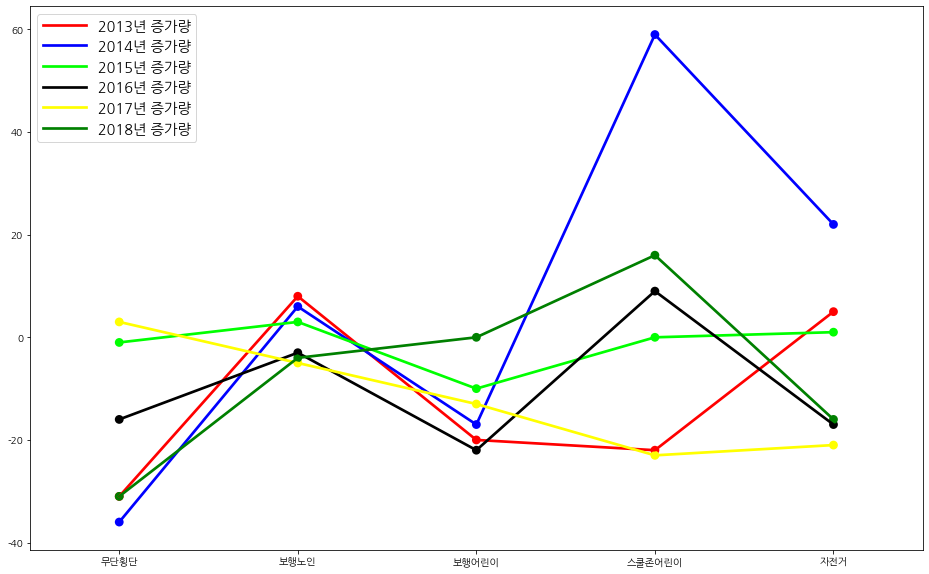

In [394]:
f,ax=plt.subplots(1,1,figsize=(16,10))

sns.pointplot(ax=ax,x=df5.index,y=df5[2013].values,color='red',alpha=0.8)
sns.pointplot(ax=ax,x=df5.index,y=df5[2014].values,color='blue',alpha=0.8)
sns.pointplot(ax=ax,x=df5.index,y=df5[2015].values,color='lime',alpha=0.8)
sns.pointplot(ax=ax,x=df5.index,y=df5[2016].values,color='black',alpha=0.8)
sns.pointplot(ax=ax,x=df5.index,y=df5[2017].values,color='yellow',alpha=0.8)
sns.pointplot(ax=ax,x=df5.index,y=df5[2018].values,color='green',alpha=0.8)

plt.legend(loc='upper left',fontsize='x-large',handles=ax.lines[::len(df5)+1], labels=["2013년 증가량","2014년 증가량","2015년 증가량","2016년 증가량","2017년 증가량","2018년 증가량"])
plt.show()

# 8. 지역별 사고건수
## => 데이터를 지역별로 parsing하여 사고건수 계산
##      서울,경기의 사고건수가 가장 많음

In [8]:
df6 = df

In [9]:
len(df6)

10365

In [10]:
for i in range(0,len(df6)):
    df6["사고지역위치명"][i] =df["사고지역위치명"][i].split()[0]

C:\Users\acorn-509\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df6["사고지역위치명"]

0        서울특별시
1        서울특별시
2        서울특별시
3        서울특별시
4        서울특별시
         ...  
10360      경기도
10361      경기도
10362      경기도
10363      경기도
10364      경기도
Name: 사고지역위치명, Length: 10365, dtype: object

In [15]:
df7 = pd.pivot_table(df6,index=["사고지역위치명"],values=["발생건수"],aggfunc=np.sum)

In [16]:
df7.sort_values(by=["발생건수"],ascending=False,inplace=True)
df7

,발생건수
사고지역위치명,
서울특별시,14792
경기도,8704
대구광역시,5058
부산광역시,3596
경상북도,2263
경상남도,2226
전라북도,1742
인천광역시,1724
충청북도,1475


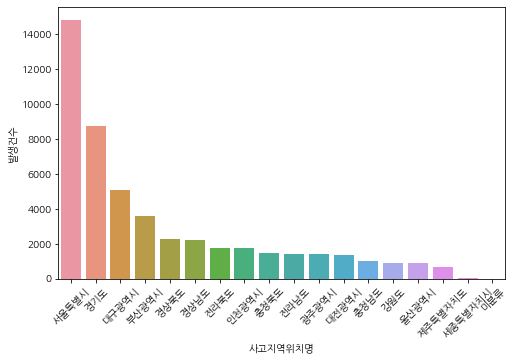

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x=df7.index,y=df7["발생건수"])
plt.xticks(rotation=45)
plt.show()